In [4]:
import pandas as pd

csv_file_group = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\enterprise-attack-v15.1-groups.xlsx"
# Load the second sheet ('techniques used') containing techniques observed among apt groups
df_group = pd.read_excel(csv_file_group, sheet_name='groups')

# Extract the unique IDs from the first sheet (universe of techniques)
observed_group_ids_enterprise = df_group['ID'].unique()
print(len(observed_group_ids_enterprise))


148


In [5]:
csv_file_mobile = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\mobile-attack-v15.1-groups.xlsx"
# Load the second sheet ('techniques used') containing techniques observed among apt groups
df_mobile = pd.read_excel(csv_file_mobile, sheet_name='groups')

observed_group_ids_mobile = df_mobile['ID'].unique()
print(len(observed_group_ids_mobile))

13


In [6]:
csv_file_ics = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\ics-attack-v15.1-groups.xlsx"
# Load the second sheet ('techniques used') containing techniques observed among apt groups
df_ics = pd.read_excel(csv_file_ics, sheet_name='groups')

observed_group_ids_ics = df_ics['ID'].unique()
print(len(observed_group_ids_ics))

14


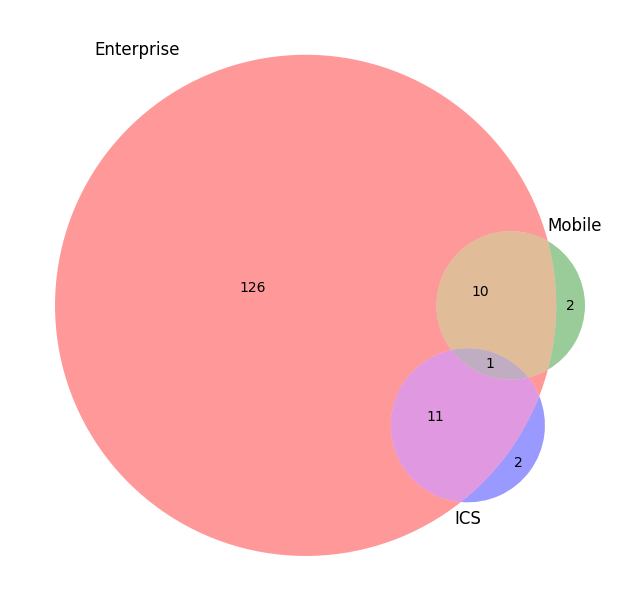

In [7]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3

# Convert lists to sets for easier manipulation
enterprise_set = set(observed_group_ids_enterprise)
mobile_set = set(observed_group_ids_mobile)
ics_set = set(observed_group_ids_ics)
# Create a Venn diagram with 3 sets
plt.figure(figsize=(8, 8))
venn = venn3([enterprise_set, mobile_set, ics_set], ('Enterprise', 'Mobile', 'ICS'))

# Display the plot
#plt.title("Venn Diagram of Group IDs across Enterprise, Mobile, and ICS")
plt.savefig("venn_diagram_groups.pdf", format='pdf')
plt.show()


In [9]:
# Find techniques that are in all three sets (intersection)
groups_in_all_three = enterprise_set & mobile_set & ics_set

# Find techniques that are only in mobile (difference with enterprise and ICS)
groups_only_in_mobile = mobile_set - (enterprise_set | ics_set)

# Find techniques that are only in ICS (difference with enterprise and mobile)
groups_only_in_ics = ics_set - (enterprise_set | mobile_set)

# Output the results
print("Groups in all three categories (Enterprise, Mobile, ICS):")
print(techniques_in_all_three)

print("Groups only in Mobile (not in Enterprise or ICS):")
print(techniques_only_in_mobile)

print("Groups only in ICS (not in Enterprise or Mobile):")
print(techniques_only_in_ics)


Groups in all three categories (Enterprise, Mobile, ICS):
{'G0034'}
Groups only in Mobile (not in Enterprise or ICS):
{'G1029', 'G0097'}
Groups only in ICS (not in Enterprise or Mobile):
{'G1027', 'G1000'}


In [11]:
import pandas as pd

# Load the first sheet ('techniques') containing the universe of all techniques
csv_file = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\enterprise-attack-v15.1-techniques.xlsx"
df1 = pd.read_excel(csv_file, sheet_name='techniques')

csv_file1 = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\enterprise-attack-v15.1-groups.xlsx"
# Load the second sheet ('techniques used') containing techniques observed among apt groups
df2 = pd.read_excel(csv_file1, sheet_name='techniques used')

# Extract both 'ID' and 'name' from the first sheet
all_techniques = df1[['ID', 'name']]

# Extract the target IDs from the second sheet (observed techniques)
observed_technique_ids = df2['target ID'].unique()

# Find the techniques not observed (IDs in df1 but not in df2)
unobserved_techniques = all_techniques[~all_techniques['ID'].isin(observed_technique_ids)]

# Calculate statistics
total_techniques = len(all_techniques)
observed_techniques = total_techniques - len(unobserved_techniques)
unobserved_techniques_count = len(unobserved_techniques)

# Output the stats
print(f"Total techniques reported by MITRE: {total_techniques}")
print(f"Total techniques observed in APT groups: {observed_techniques}")
print(f"Techniques not covered by the APT groups: {unobserved_techniques_count}")

# Adjust pandas settings to display more rows and full content
pd.set_option('display.max_rows', 35)  # Set the max number of rows to display
#pd.set_option('display.max_colwidth', None)  # Display full column content without truncation

# Display the first 25 techniques (ID and name) that are not observed
print("\nTechniques not observed (ID and name):")
print(unobserved_techniques.head(35))


Total techniques reported by MITRE: 637
Total techniques observed in APT groups: 421
Techniques not covered by the APT groups: 216

Techniques not observed (ID and name):
           ID                                               name
0       T1548                  Abuse Elevation Control Mechanism
2   T1548.004  Abuse Elevation Control Mechanism: Elevated Ex...
3   T1548.001  Abuse Elevation Control Mechanism: Setuid and ...
4   T1548.003  Abuse Elevation Control Mechanism: Sudo and Su...
5   T1548.006  Abuse Elevation Control Mechanism: TCC Manipul...
6   T1548.005  Abuse Elevation Control Mechanism: Temporary E...
10  T1134.004     Access Token Manipulation: Parent PID Spoofing
11  T1134.005   Access Token Manipulation: SID-History Injection
20  T1098.001  Account Manipulation: Additional Cloud Credent...
22  T1098.006  Account Manipulation: Additional Container Clu...
26      T1650                                     Acquire Access
28  T1583.005                     Acquire Infrast

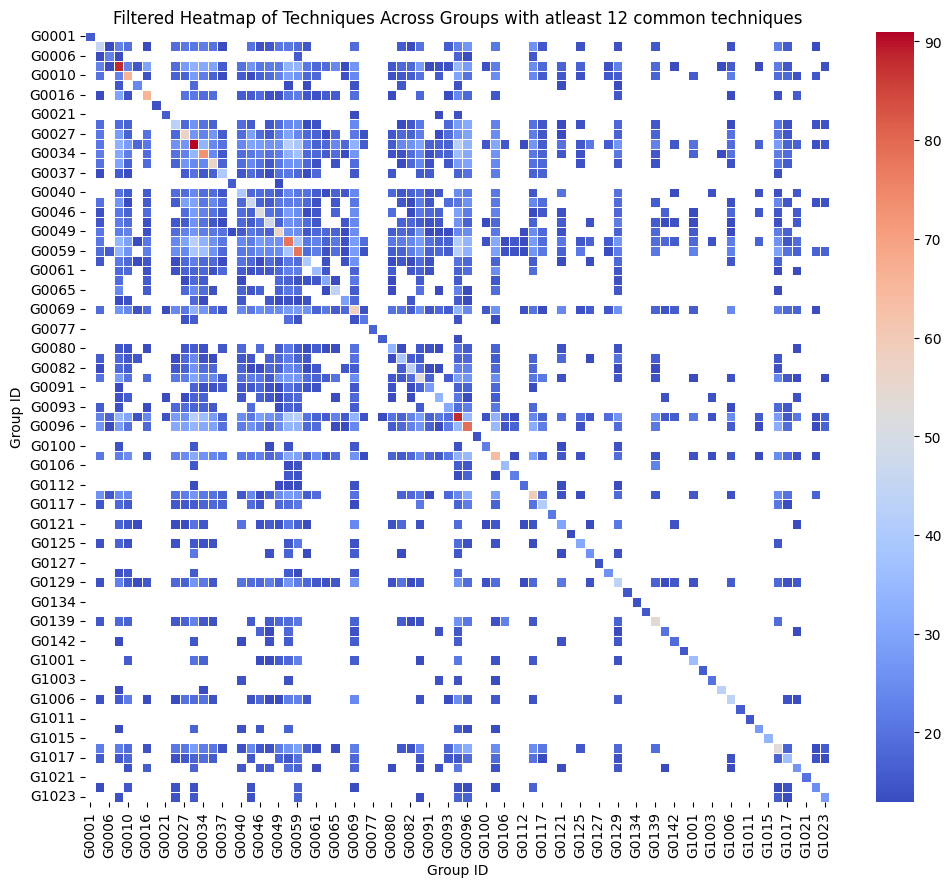

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the Excel sheet into a DataFrame
file_path = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\enterprise-attack-v15.1-groups.xlsx"
sheet_name = 'techniques used'

# Load the data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Step 2: Group techniques by "Source ID"
grouped_techniques = df.groupby('source ID')['target ID'].apply(set)

# Step 3: Initialize an empty co-occurrence matrix
group_ids = grouped_techniques.index
cooccurrence_matrix = pd.DataFrame(0, index=group_ids, columns=group_ids)

# Step 4: Fill the co-occurrence matrix with counts of similar techniques
for group_a in group_ids:
    for group_b in group_ids:
        # Find intersection of techniques between group A and group B
        common_techniques = grouped_techniques[group_a] & grouped_techniques[group_b]
        cooccurrence_matrix.loc[group_a, group_b] = len(common_techniques)

# Set a threshold for minimum shared techniques between groups
min_shared_techniques = 12  # You can adjust this threshold

# Filter the co-occurrence matrix to only show groups with a minimum count of shared techniques
filtered_cooccurrence_matrix = cooccurrence_matrix[cooccurrence_matrix > min_shared_techniques].dropna(how='all', axis=0).dropna(how='all', axis=1)

# Plot the filtered heatmap
plt.figure(figsize=(12, 10))

# Use .0f to handle any floats and display whole numbers
sns.heatmap(filtered_cooccurrence_matrix, annot=False, fmt='.0f', cmap='coolwarm', linewidths=0.5)
plt.title('Filtered Heatmap of Techniques Across Groups with atleast 12 common techniques')
plt.xlabel('Group ID')
plt.ylabel('Group ID')

# Save the plot
plt.savefig("enterprise_technique_cooccurrence_heatmap_12.pdf", format='pdf')
plt.show()



In [9]:
# Loop through each row in the DataFrame and print it
#for index, value in grouped_techniques.items():
#    print(f"Source ID: {index}\nTechniques: {value}\n")


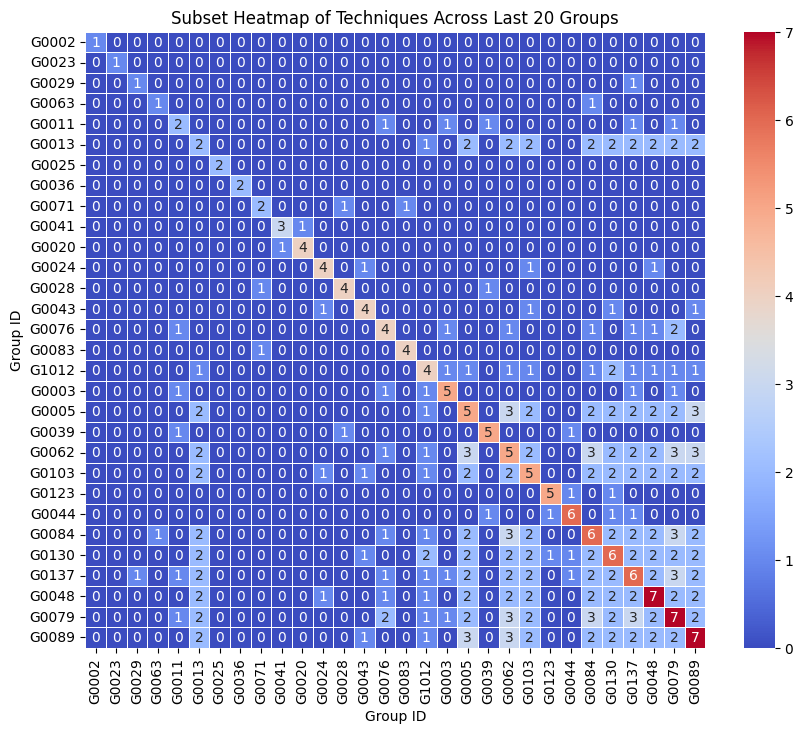

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Read the Excel sheet into a DataFrame
file_path = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\enterprise-attack-v15.1-groups.xlsx"
sheet_name = 'techniques used'

# Load the data
df = pd.read_excel(file_path, sheet_name=sheet_name)

# Step 2: Group techniques by "Source ID"
grouped_techniques = df.groupby('source ID')['target ID'].apply(set)

# Step 3: Count the number of techniques for each group
technique_counts = grouped_techniques.apply(len)

# Step 4: Select the top 20 groups with the most techniques
#top_20_groups = technique_counts.nlargest(20).index.tolist()

last_20_groups = technique_counts.nsmallest(30).index.tolist()


# Step 5: Initialize an empty co-occurrence matrix
group_ids = grouped_techniques.index
cooccurrence_matrix = pd.DataFrame(0, index=group_ids, columns=group_ids)

# Step 6: Fill the co-occurrence matrix with counts of similar techniques
for group_a in group_ids:
    for group_b in group_ids:
        # Find intersection of techniques between group A and group B
        common_techniques = grouped_techniques[group_a] & grouped_techniques[group_b]
        cooccurrence_matrix.loc[group_a, group_b] = len(common_techniques)

# Step 7: Subset the co-occurrence matrix to include only the top 20 groups
#subset_matrix = cooccurrence_matrix.loc[top_20_groups, top_20_groups]
subset_matrix = cooccurrence_matrix.loc[last_20_groups, last_20_groups]



# Step 8: Plot the heatmap for the top 20 groups
plt.figure(figsize=(10, 8))
sns.heatmap(subset_matrix, annot=True, fmt='d', cmap='coolwarm', linewidths=0.5)
plt.title('Subset Heatmap of Techniques Across Last 20 Groups')
plt.xlabel('Group ID')
plt.ylabel('Group ID')
# Save the heatmap as a PDF
#plt.savefig("enterprise_technique_cooccurrence_heatmap_top_20.pdf", format='pdf')
plt.show()



In [38]:
import pandas as pd

# Step 1: Define file paths for the three spreadsheets
file_path_1 = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\enterprise-attack-v15.1-groups.xlsx"
file_path_2 = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\mobile-attack-v15.1-groups.xlsx"
file_path_3 = r"C:\Users\ricewater\Documents\CTITTP\ATTACK Excel sheets\ics-attack-v15.1-groups.xlsx"

# Step 2: Read the "Citations" sheet and extract the "URL" column from each spreadsheet
df1 = pd.read_excel(file_path_1, sheet_name='citations')['url'].dropna()
df2 = pd.read_excel(file_path_2, sheet_name='citations')['url'].dropna()
df3 = pd.read_excel(file_path_3, sheet_name='citations')['url'].dropna()

# Step 3: Create a union of all unique URLs across the three spreadsheets
all_urls_union = pd.concat([df1, df2, df3]).drop_duplicates()
unique_url_count = all_urls_union.nunique()
print(len(df1), df1.nunique())

# Step 4: Output the count of unique URLs
print(f"Total number of unique URLs across all three spreadsheets: {unique_url_count}")

# Step 5: Find URLs that are in spreadsheet 3 and spreadsheet 2, but not in spreadsheet 1
urls_in_2_and_3_but_not_in_1 = pd.concat([df2, df3]).drop_duplicates(keep=False)[~pd.concat([df2, df3]).drop_duplicates(keep=False).isin(df1)].dropna()

# Step 6: Output the list of URLs that are in spreadsheet 2 and 3 but not in spreadsheet 1
print("URLs in spreadsheet 2 and spreadsheet 3 but not in spreadsheet 1:")
print(urls_in_2_and_3_but_not_in_1.tolist())
print(len(urls_in_2_and_3_but_not_in_1))


1372 905
Total number of unique URLs across all three spreadsheets: 930
URLs in spreadsheet 2 and spreadsheet 3 but not in spreadsheet 1:
['https://www.youtube.com/watch?v=xoNSbm1aX_w', 'https://www.crowdstrike.com/wp-content/brochures/FancyBearTracksUkrainianArtillery.pdf', 'https://www.cyfirma.com/outofband/apt-bahamut-attacks-indian-intelligence-operative-using-android-malware/', 'https://www.blackberry.com/us/en/pdfviewer?file=/content/dam/blackberry-com/asset/enterprise/pdf/direct/mobile-malware-report.pdf', 'https://web.archive.org/web/20240226125457/https://research.checkpoint.com/2020/hamas-android-malware-on-idf-soldiers-this-is-how-it-happened/', 'https://www.lookout.com/blog/lookout-discovers-novel-confucius-apt-android-spyware-linked-to-india-pakistan-conflict', 'https://web.archive.org/web/20231208015605/https://news.sophos.com/en-us/2021/11/23/android-apt-spyware-targeting-middle-east-victims-improves-its-capabilities/', 'https://www.wired.com/story/iran-hackers-us-phishi